In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [370]:
df=pd.read_csv("insurance.csv")


In [371]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### No null values found in the dataset!

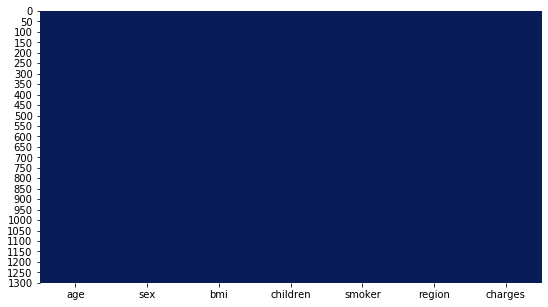

In [7]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

### From graph we can make sure there are no null values !

In [8]:
df.shape

(1338, 7)

### Extract unique values of region attribute so later we can conert to numeric and use it in the model!

In [9]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
#df.describe()
df.describe().transpose() #for more organization

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [25]:
print(df['age'].median())
print(df['bmi'].median())

39.0
30.4


In [11]:
df.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [12]:
c=df.corr()
c

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Check duplicates rows then drop them !

In [372]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  1
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [373]:
df.drop(df.index[581], inplace=True)

### Plot to discover outliers!

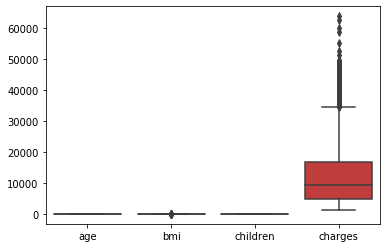

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)

### Frome graph we can notice thet there is some outliers in charges attributes ! , However we will see accuracy with and without removing outliers to if see our models are roubust to them and give a good accuracy? or not ?

In [109]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

age           0
bmi           9
charges     139
children      0
region        0
sex           0
smoker        0
dtype: int64

In [17]:
df.shape[0]

1337

In [374]:
#convert sex to 1 for female and 0 male:

df.sex.loc[df['sex']=='female']=1
df.sex.loc[df['sex']=='male']=0

#convert smoker to 1 for yes and 0 for no :
df.smoker.loc[df['smoker']=='yes']=1
df.smoker.loc[df['smoker']=='no']=0

#convert region to numeric :
regions={'region':{'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}}
df.replace(regions,inplace=True)
df.head()
    

D:\anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [20]:
df.to_csv('CleanedInsurance.csv', index = False)

In [45]:
#Correlation with output variable
cor_target = abs(c["charges"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

age        0.299008
charges    1.000000
Name: charges, dtype: float64

#### From above and correaltopn tabe we can see that there is no strong corelations on the data , However there are many cases where  variables might not show a strong bivariate correlation but may show a strong association in regression , so lets build our model and see the accuracy!

## visualisation

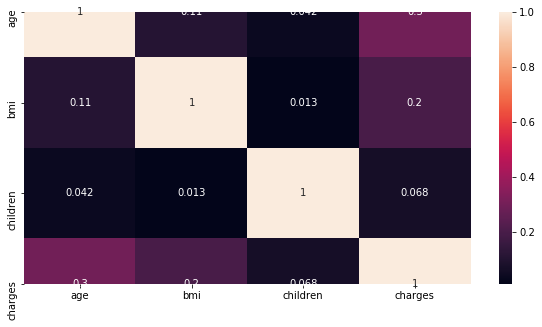

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(c, annot=True)

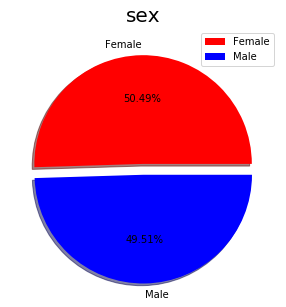

In [22]:
labels = ['Female', 'Male']
size = df['sex'].value_counts()
colors = ['red', 'blue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('sex', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

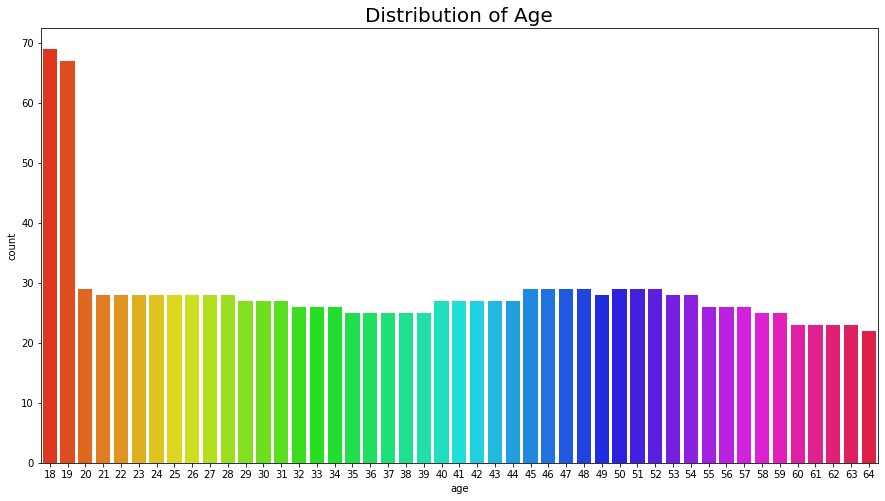

In [23]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

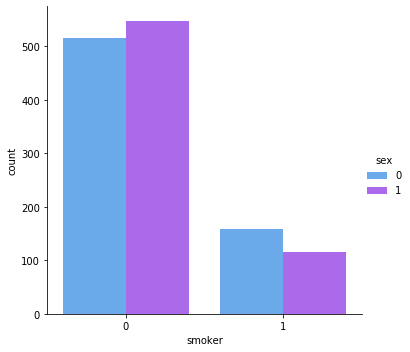

In [24]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="cool", data=df)

D:\anaconda\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


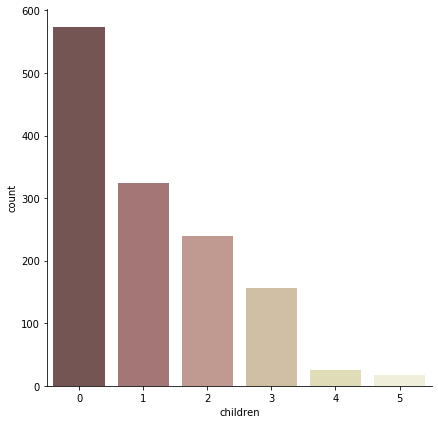

In [25]:
sns.catplot(x="children", kind="count", palette="pink", data=df, size = 6)

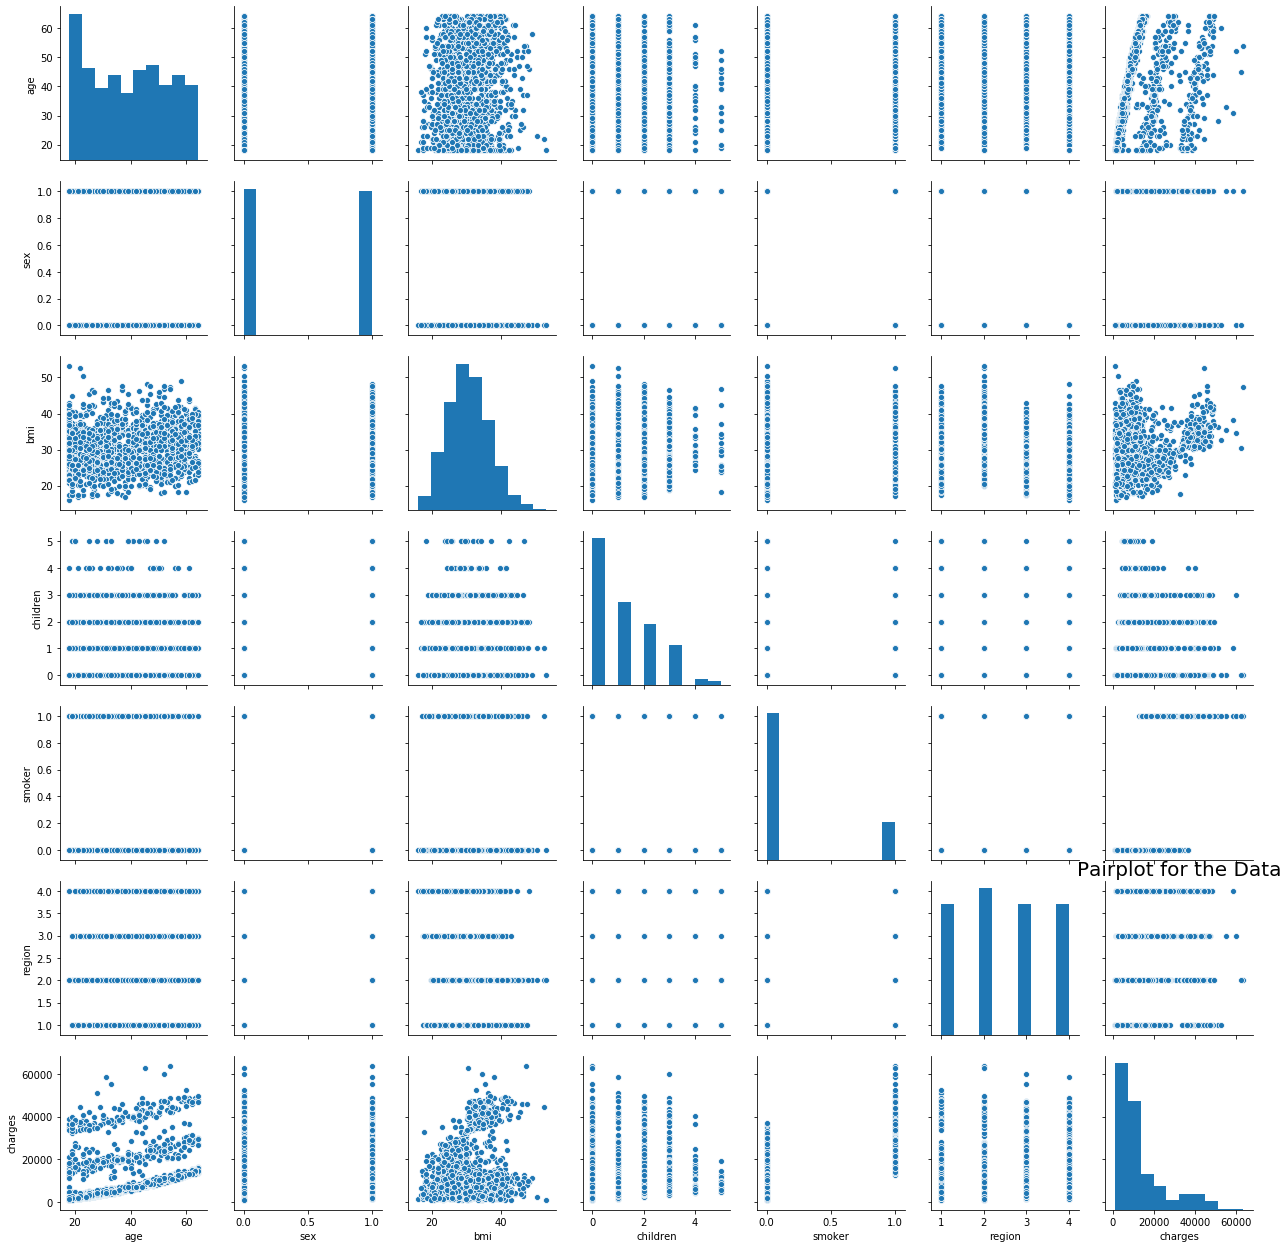

In [26]:
sns.pairplot(df)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

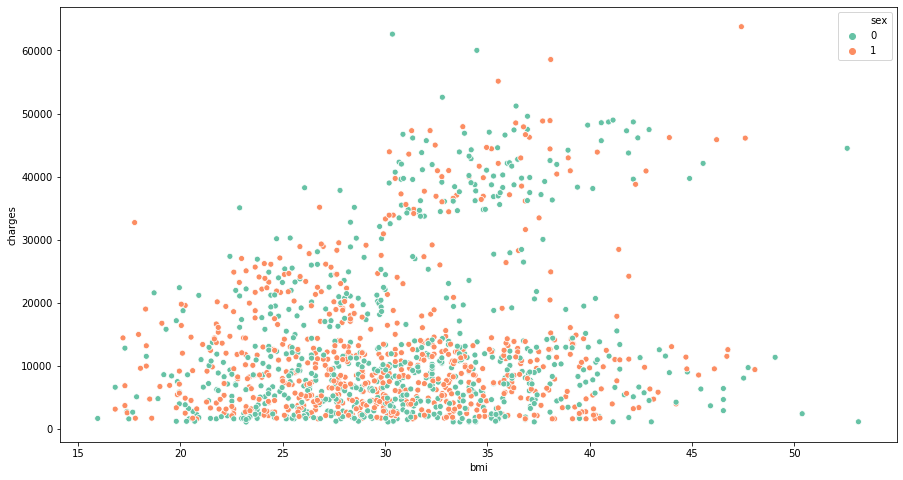

In [27]:
sns.scatterplot(x="bmi", y="charges", data=df, palette='Set2', hue='sex')

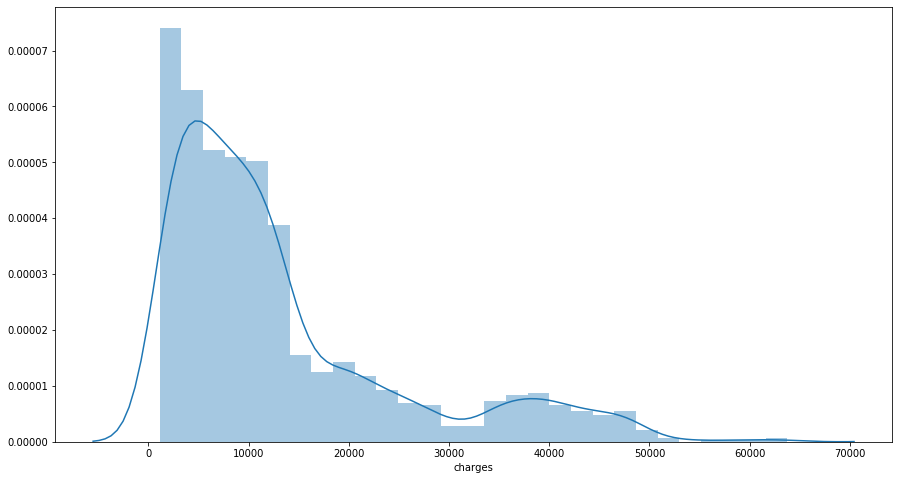

In [28]:
sns.distplot(df['charges'])

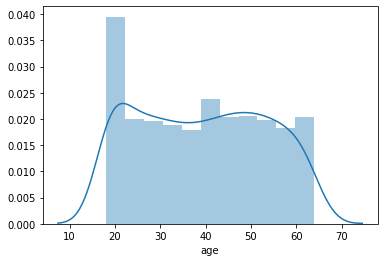

In [26]:
sns.distplot(df['age'])

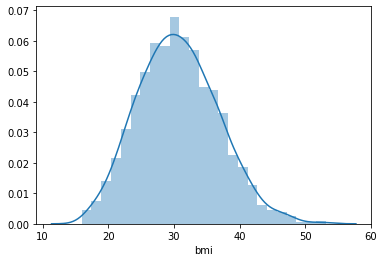

In [27]:
sns.distplot(df['bmi'])

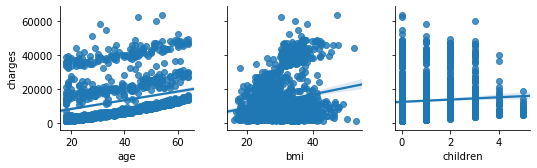

In [31]:
feature_cols = ['age', 'bmi','children']
# multiple scatter plots, note that we're not including 'sex' and 'smoker', why? because it is catogoricalة
sns.pairplot(df, x_vars=feature_cols, y_vars='charges', kind='reg')

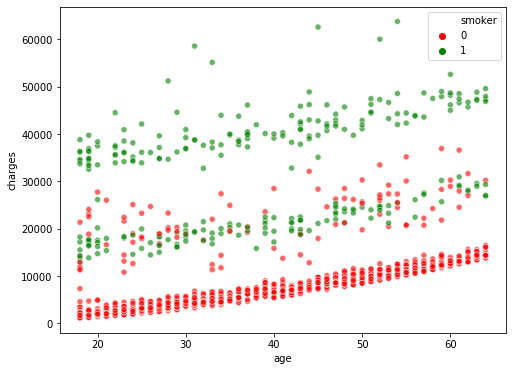

In [211]:
#Scatter plot to seeif there is a dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

<Figure size 576x432 with 0 Axes>

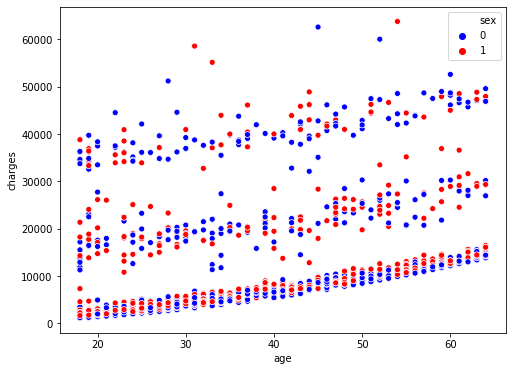

In [232]:
#Scatter plot to see if there is a dependency between attributes sex and charges accross different ages
plt.figure(figsize=(8,6))
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['blue','red'] )
plt.show()

<Figure size 576x432 with 0 Axes>

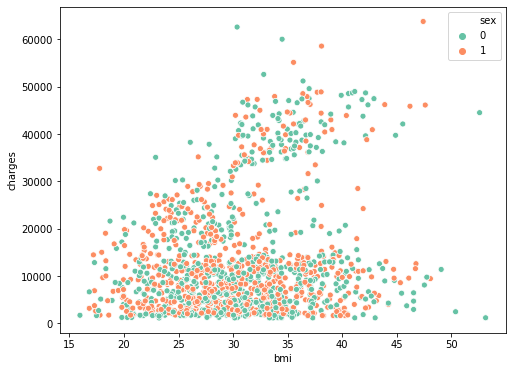

In [233]:
#Scatter plot to see if there is a dependency between attributes sex and charges accross different ages
plt.figure(figsize=(8,6))
plt.figure(figsize=(8,6))
sns.scatterplot(df.bmi, df.charges,hue=df.sex,palette= 'Set2' )
plt.show()

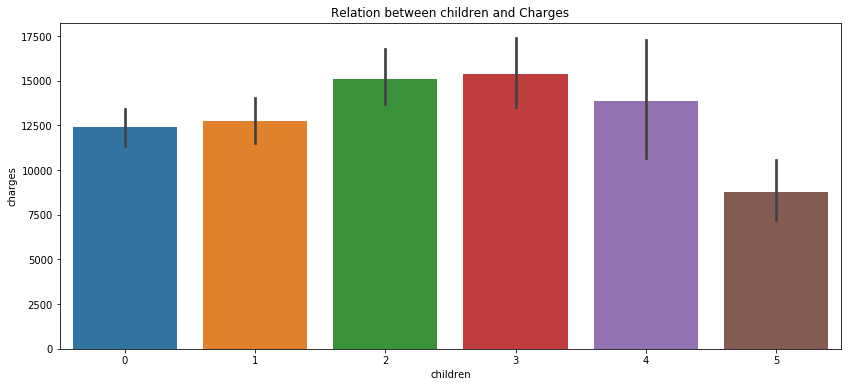

In [216]:
plt.figure(figsize=(14,6))
plt.title('Relation between children and Charges')
#sns.regplot(x=df['children'],y=df['charges'])
sns.barplot(x=df['children'], y=df['charges'])

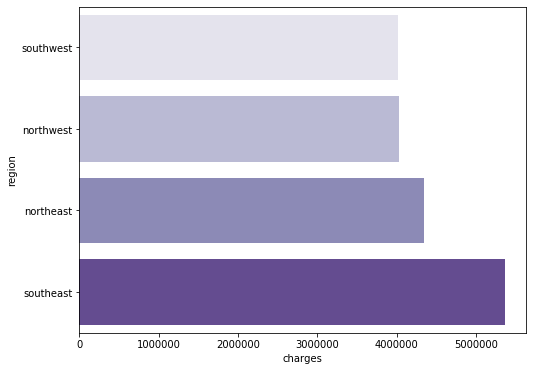

In [21]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Purples')

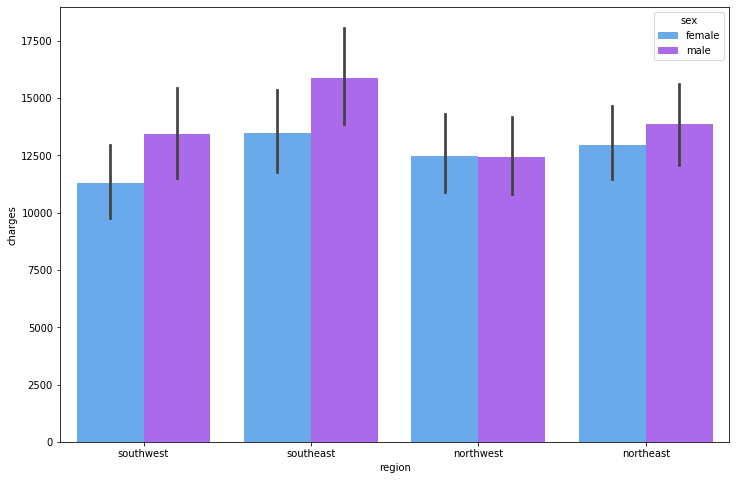

In [22]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

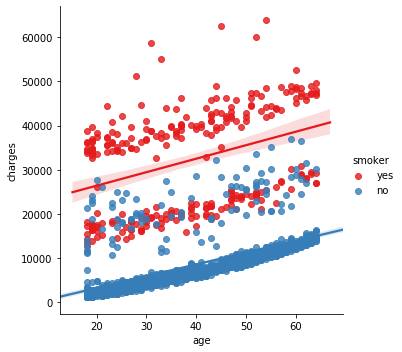

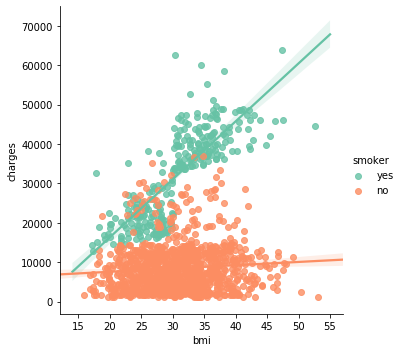

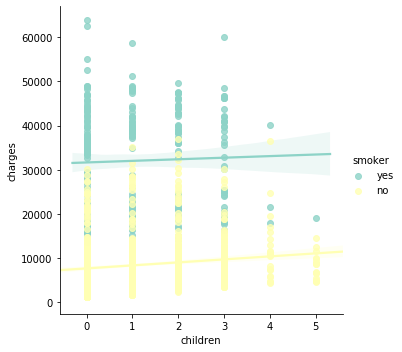

In [23]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

In [219]:
print(df['charges'].min())
print(df['charges'].max())


1121.8739
63770.42801


In [221]:
df['charges_bins'] = pd.cut(df['charges'], bins=[0, 1300, 26000, 39000, 52000, 65000])
df.head()


,age,sex,bmi,children,smoker,region,charges,charges_bins
0,19,1,27.900,0,1,1,16884.92400,"(1300, 26000]"
1,18,0,33.770,1,0,2,1725.55230,"(1300, 26000]"
2,28,0,33.000,3,0,2,4449.46200,"(1300, 26000]"
3,33,0,22.705,0,0,3,21984.47061,"(1300, 26000]"
4,32,0,28.880,0,0,3,3866.85520,"(1300, 26000]"


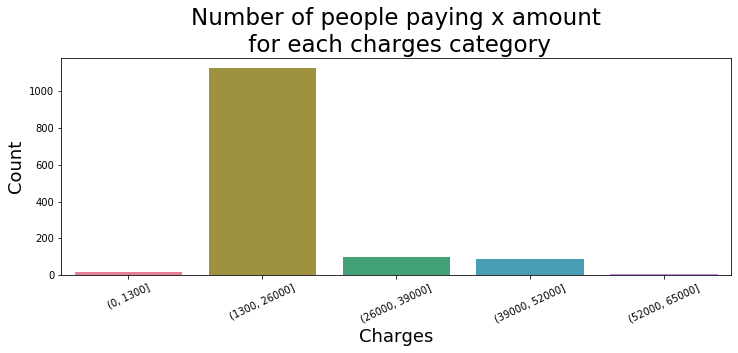

In [222]:
#Creating a countplot based on the amount of charges
plt.figure(figsize=(12,4))
sns.countplot(x='charges_bins', data=df, palette='husl') 
plt.title('Number of people paying x amount\n for each charges category', size='23')
plt.xticks(rotation='25')
plt.ylabel('Count',size=18)
plt.xlabel('Charges',size=18)
plt.show()

### Start Regression

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [62]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


### 1- build model without removing outliers!

In [116]:
feature_cols = ['age','sex','bmi','children','smoker','region'] # a lsit of the predictors
X1 = df[feature_cols] # subsetting our data to only the predictors
y1 = df['charges'] # our response variable
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,train_size=0.75)

In [117]:

# Pick a new random training and test set

linreg = LinearRegression()
linreg.fit(X_train1, y_train1)
y_pred = linreg.predict(X_test1)

In [118]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)
print(feature_cols)
print(linreg.intercept_)
print(linreg.coef_)

['age', 'sex', 'bmi', 'children', 'smoker', 'region']
-13033.041865527939
[  247.05110926   359.29176319   335.92585999   473.55360332
 23596.20100049   253.34755125]


In [119]:
# score it on our test set to get a better sense of out of sample performance
linreg.score(X_test1, y_test1)

0.7271937409438692

In [120]:
linreg.score(X_train1, y_train1)

0.7588973287545373

In [99]:

print('MAE:', metrics.mean_absolute_error(y_test1, y_pred))
print('MSE:', metrics.mean_squared_error(y_test1, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

MAE: 4265.794939581006
MSE: 35056802.40423402
RMSE: 5920.87851625365


Text(0, 0.5, 'Frequency')

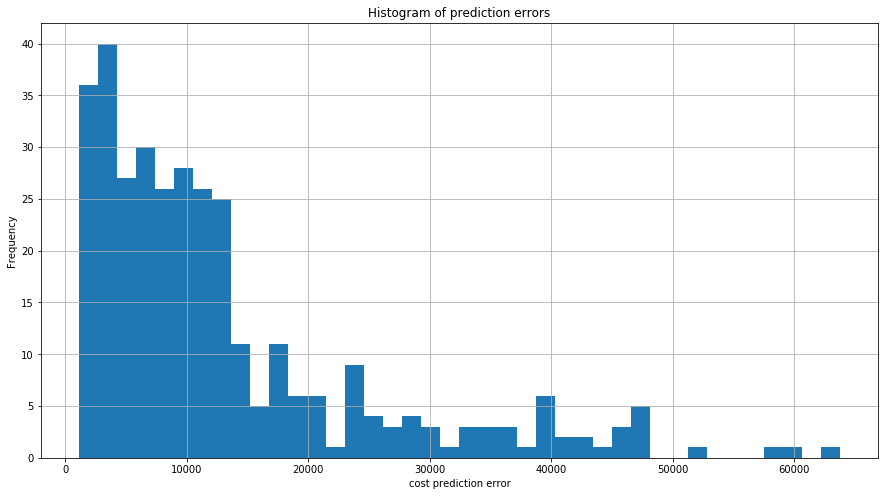

In [237]:
diff = y_test1 - y_pred
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('cost prediction error')
plt.ylabel('Frequency')

In [148]:
import plotly.express as px
import plotly.graph_objects as go

# fig = px.scatter(x=y_test1, y=y_pred, labels={'x': 'ground truth', 'y': 'prediction'})
# fig.add_shape(
#     type="line", line=dict(dash='dash'),
#     x0=y1.min(), y0=y1.min(),
#     x1=y1.max(), y1=y1.max()
# )
# fig.show()

In [302]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
xShuffled, yShuffled = shuffle(X_train1, y_train1)
from sklearn.metrics import mean_squared_error
from copy import deepcopy
xShuffled, yShuffled = shuffle(X1, y1)
linearModel = LinearRegression()

round_num = 0
best_epoch = None
best_model =[]
rmse_train = []
rmse_val = []
testacc=[]
best_model_acc=[]
best_model_acc22=[]
MAE=[]
MSE=[]
RSMETest=[]
RSMETrain=[]
aa=[]
aaa=[]
testacc.append(0)
best_trainAcuu=0
best_testAcuu=0
aa=0
prportions=[0.75,0.80,0.90]
for i in range(3):
    round_num = round_num + 1
    X_train7, X_test7, y_train7, y_test7 = train_test_split(X1, y1,train_size=prportions[i])
   
    print("Round #", round_num)

    
    print("Running...")
    mse_val_min = float("inf")
    n_no_change = 0
    testacc=[]
    testacc.append(0)
    best_trainAcuu=0
    best_testAcuu=0
    for epoch in range(1,5000):
        linearModel.fit(X_train7, y_train7)
        Y_train_predict = linearModel.predict(X_train7)
        train_error = mean_squared_error(y_train7,Y_train_predict)
        rmse_train.append(np.sqrt(train_error))
        Y_val_predict = linearModel.predict(X_test7)
        val_error = mean_squared_error(y_test7,Y_val_predict )
        rmse_val.append(np.sqrt(val_error))
    
        if val_error < mse_val_min:
            n_no_change = 0
            mse_val_min = val_error
            best_testAcuu=deepcopy(linearModel).score(X_test7, y_test7)
            if(best_testAcuu>np.max(testacc)):
                best_epoch = epoch
                best=deepcopy(linearModel)
                best_model.append(deepcopy(linearModel))
                best_testAcuu=best.score(X_test7, y_test7)
                best_trainAcuu=best.score(X_train7, y_train7)
                testacc.append(best_testAcuu)
                best_model_acc.append(best_testAcuu)
                best_model_acc22.append(best_trainAcuu)
                y_pred22222=best.predict(X_test7)
                MAE.append(metrics.mean_absolute_error(y_test7, y_pred22222))
                MSE.append(metrics.mean_squared_error(y_test7, y_pred22222))
                RSMETest.append(np.sqrt(metrics.mean_squared_error(y_test7, y_pred22222)))
                RSMETrain.append(np.sqrt(metrics.mean_squared_error(y_train7, best.predict(X_train7))))
                print(RSMETest)
                zip(feature_cols, linreg.coef_)
                print(feature_cols)
                print(linreg.intercept_)
                print(linreg.coef_)
                fig = px.scatter(x=y_test7, y=y_pred22222, labels={'x': 'ground truth', 'y': 'prediction'})
                fig.add_shape(
                    type="line", line=dict(dash='dash'),
                    x0=y1.min(), y0=y1.min(),
                    x1=y1.max(), y1=y1.max()
                )
                fig.show()

        else:
            n_no_change = n_no_change + 1
    
        if n_no_change >= 1000:
            print('Time to stop!')
            print('num epoch =', epoch)
            print('best epoch = ', best_epoch,', from round #', round_num)
            print('accuracy',best_testAcuu)
            print('accuracy',np.max(testacc))
            y_pred22222=best.predict(X_test7)
            break


Round # 1
Running...
[6121.330171736048]
['age', 'sex', 'bmi', 'children', 'smoker', 'region']
-13033.041865527939
[  247.05110926   359.29176319   335.92585999   473.55360332
 23596.20100049   253.34755125]


Time to stop!
num epoch = 1001
best epoch =  1 , from round # 1
accuracy 0.7454423487136761
accuracy 0.7454423487136761
Round # 2
Running...
[6121.330171736048, 5857.992913173681]
['age', 'sex', 'bmi', 'children', 'smoker', 'region']
-13033.041865527939
[  247.05110926   359.29176319   335.92585999   473.55360332
 23596.20100049   253.34755125]


Time to stop!
num epoch = 1001
best epoch =  1 , from round # 2
accuracy 0.7374284596337846
accuracy 0.7374284596337846
Round # 3
Running...
[6121.330171736048, 5857.992913173681, 5699.910144722673]
['age', 'sex', 'bmi', 'children', 'smoker', 'region']
-13033.041865527939
[  247.05110926   359.29176319   335.92585999   473.55360332
 23596.20100049   253.34755125]


Time to stop!
num epoch = 1001
best epoch =  1 , from round # 3
accuracy 0.7620903435895654
accuracy 0.7620903435895654


In [317]:
index=best_model_acc.index(np.max(best_model_acc))
index=0

In [338]:
best_model_acc

[0.9074626865671642, 0.914179104477612]

In [318]:
print('MAE:', MAE[index])
print('MSE:', MSE[index])
print('RMSE:', RSMETest[index])

MAE: 4299.662314546471
MSE: 37470683.071406074
RMSE: 6121.330171736048


In [313]:
aa=best_model_acc
aa

[0.7454423487136761, 0.7374284596337846, 0.7620903435895654]

In [320]:
for i in range(3):
    y=aa[i]
    
    aa[i]=(1-y)
aa

[0.2545576512863239, 0.26257154036621544, 0.2379096564104346]

In [316]:
yy=best_model_acc22
yy

[0.7520114553332818, 0.7530820259762527, 0.7488518689694817]

In [319]:
for i in range(3):
    y=yy[i]
    
    yy[i]=(1-y)
yy

[0.24798854466671816, 0.24691797402374727, 0.25114813103051825]

In [272]:
print('Train accuracy',yy[0])
print('Test accuracy',aa[0])

Train accuracy 0.752056807888891
Test accuracy 0.7408635945423183


In [ ]:
import tensorflow as tf
linearModel = LinearRegression()
callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
history1 = linearModel.fit(X_train7, y_train7, epochs=50,validation_data=(X_test7, y_test7),callbacks=[callback])

In [75]:
np.max(acuuTestList)

0.7262891499668089

In [76]:
best_testAcuu

0.7262891499668089

In [77]:
best_trainAcuu

0.7577844823145377

In [ ]:
#5000 epoch 
#split data
#fit
#train error & Test

In [177]:
# total rmse on the train + validation sets
yTrainHatLog = best_model.predict(X_test7)
print(np.sqrt(mean_squared_error(yTrainHatLog,y_test7)))

6573.053685287878


In [217]:
print(best_trainAcuu)
best_testAcuu

0.750598943508316


0.7487732278290331

In [166]:
ebochs=[]
i=0
for i in range(3):
    ebochs.append(i)

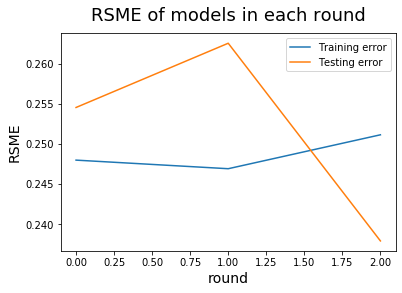

In [307]:
plt.plot(ebochs,yy, label = 'Training error')
plt.plot(ebochs,aa, label = 'Testing error')

plt.ylabel('error', fontsize = 14)
plt.xlabel('round', fontsize = 14)
title = 'Error of models in each round'
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()

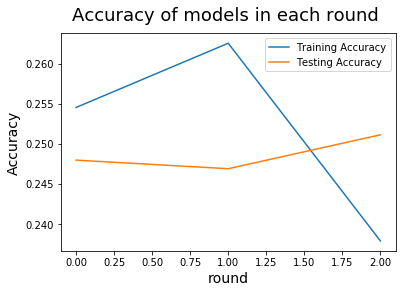

In [308]:
plt.plot(ebochs,best_model_acc, label = 'Training Accuracy')
plt.plot(ebochs,best_model_acc22, label = 'Testing Accuracy')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('round', fontsize = 14)
title = 'Accuracy of models in each round '
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()

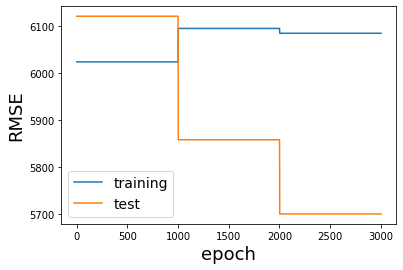

In [309]:
fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4))
plt.subplots_adjust(wspace=0.5)

ax.plot(rmse_train, label = 'training')
ax.plot(rmse_val, label = 'test')
ax.set_xlabel('epoch', fontsize = 18)
ax.set_ylabel('RMSE', fontsize = 18)
ax.legend(fontsize=14)
plt.show()

In [157]:
best_model.score(X_test8, y_test8)

AttributeError: 'list' object has no attribute 'score'

In [220]:
best_model.score(X_train1, y_train1)

0.741763279083792

In [146]:
y_pred22222 = best_model.predict(X_test1)
print(np.sqrt(mean_squared_error(y_pred22222,y_test1)))

5719.400790661847


In [120]:
print('MAE:', metrics.mean_absolute_error(y_test1, y_pred22222))
print('MSE:', metrics.mean_squared_error(y_test1, y_pred22222))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred22222)))

MAE: 3804.0111049585894
MSE: 32662128.991725214
RMSE: 5715.0790888425345


In [116]:
fig = px.scatter(x=y_test1, y=y_pred22222, labels={'x': 'ground truth', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y1.min(), y0=y1.min(),
    x1=y1.max(), y1=y1.max()
)
fig.show()

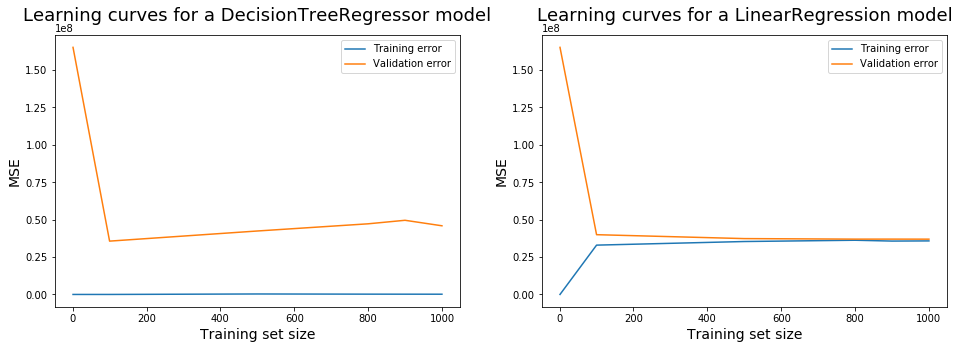

In [188]:
### Bundling our previous work into a function ###
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes =
    train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()

### Plotting the two learning curves ###

from sklearn.ensemble import RandomForestRegressor
train_sizes = [1, 100, 500, 800, 900, 1000]
features = ['age','sex','bmi','children','smoker','region']
target = ['charges']
plt.figure(figsize = (16,5))

for model, i in [(DecisionTreeRegressor(), 1), (LinearRegression(),2)]:
    plt.subplot(1,2,i)
    learning_curves(model, df, features, target, train_sizes, 5)

### using null model 

In [100]:
average_charges = df['charges'].mean()
average_charges

13279.121486655948

In [101]:
num_rows = df.shape[0]
num_rows

1337

In [102]:
null_model_predictions = [average_charges]*num_rows
null_model_predictions

[13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486655948,
 13279.121486

In [103]:
print('MAE:', metrics.mean_absolute_error(y1, null_model_predictions))
print('MSE:', metrics.mean_squared_error(y1, null_model_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1, null_model_predictions)))

MAE: 9092.460747560963
MSE: 146551117.05611628
RMSE: 12105.829878868954


So, we are beating the null model 

### Train data using ensemble (bagging) and see its performance !


In [382]:
from sklearn.ensemble import BaggingRegressor
#from sklearn import tree
#model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
#model.fit(X_train1, y_train1)
#model.score(X_test1,y_test1)

In [8]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
# from sklearn import model_selection
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# seed = 7
# kfold = model_selection.KFold(n_splits=10, random_state=seed)
# cart = DecisionTreeClassifier()
# num_trees = 100
# model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
# results = model_selection.cross_val_score(model, X1, y1, cv=kfold)
# print(results.mean())

0.9311525081360118


In [380]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [270]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
i=0
avg=[]
for i in range(5):
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cart = DecisionTreeClassifier()
    num_trees = 100
    model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
    results = model_selection.cross_val_score(model, X_train1, y_train1, cv=kfold)
    
    print('classifier',i+1,'mean results =',results.mean())
    avg.append(results.mean())

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\ensemble\_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "D:\anaconda\lib\site-packages\sklearn\ensemble\_bagging.py", line 291, in _fit
    y = self._validate_y(y)
  File "D:\anaconda\lib\site-packages\sklearn\ensemble\_bagging.py", line

classifier 1 mean results = nan
classifier 2 mean results = nan
classifier 3 mean results = nan
classifier 4 mean results = nan
classifier 5 mean results = nan


D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\ensemble\_bagging.py", line 243, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "D:\anaconda\lib\site-packages\sklearn\ensemble\_bagging.py", line 291, in _fit
    y = self._validate_y(y)
  File "D:\anaconda\lib\site-packages\sklearn\ensemble\_bagging.py", line 651, in _validate_y
    check_classification_targets(y)
  File "D:\anaconda\lib\site-packages\sklearn\utils\multiclass.py", line 172, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 

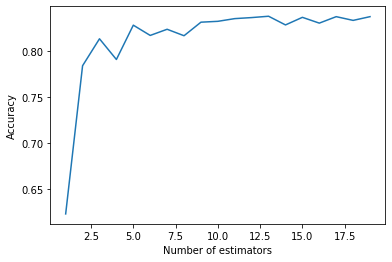

In [425]:
from sklearn.tree import DecisionTreeRegressor
estimators = list(range(1, 20))
accuracyTest = []
aacuracyTrain=[]
for n_estimators in estimators:
    clf = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                            max_samples=0.2,
                            n_estimators=n_estimators).fit(X_train1, y_train1)
    acc = clf.score(X_test1, y_test1)
    accuracyTest.append(acc)
    acc1 = clf.score(X_train1, y_train1)
    aacuracyTrain.append(acc1)
    fig = px.scatter(x=y_test1, y=clf.predict(X_test1), labels={'x': 'ground truth', 'y': 'prediction'})
    fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y1.min(), y0=y1.min(),
    x1=y1.max(), y1=y1.max()
    )
    fig.show()

plt.plot(estimators, accuracyTest)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

In [426]:
accuracyTest

[0.6233393130309853,
 0.7838090283870657,
 0.8129878039362639,
 0.7905674243630328,
 0.8277370681981243,
 0.8166247921135784,
 0.8232979493390826,
 0.8162989368791884,
 0.8309693057290881,
 0.8319028700631027,
 0.8348301981286702,
 0.835960957153663,
 0.8374036222257356,
 0.8279992661083133,
 0.8362219553731627,
 0.8299521378295172,
 0.8369556218732943,
 0.8329122601202603,
 0.8369555511029433]

In [79]:
np.mean(accuracyTest)

0.8346997611651354

In [399]:
np.max(accuracyTest)

0.8378992427392186

In [400]:
np.max(aacuracyTrain)

0.9026594947211773

In [45]:
# clf1 = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
#                             n_estimators=10,
#                             bootstrap=False,
#                             bootstrap_features=False,
#                             random_state=5).fit(X_train1, y_train1)

In [46]:
#clf1.estimators_

[DecisionTreeRegressor(random_state=1228472244),
 DecisionTreeRegressor(random_state=1538648557),
 DecisionTreeRegressor(random_state=1291004499),
 DecisionTreeRegressor(random_state=378811896),
 DecisionTreeRegressor(random_state=1715738999),
 DecisionTreeRegressor(random_state=1655026361),
 DecisionTreeRegressor(random_state=1482370082),
 DecisionTreeRegressor(random_state=1085858423),
 DecisionTreeRegressor(random_state=690222301),
 DecisionTreeRegressor(random_state=1739948426)]

### Train data with linear regression again BUT after removing outliers to see their affect in the model !

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

age           0
sex           0
bmi           9
children      0
smoker      274
region        0
charges     139
dtype: int64

In [375]:
q1 = df['charges'].quantile(0.25)
q3=df['charges'].quantile(0.75)
iqr = q3 - q1

In [377]:
charges = df[df['charges']< (q1 - 1.5 * iqr)]
charges = df[df['charges']> (q3 + 1.5 * iqr)]
charges.describe()

,age,sex,bmi,children,smoker,region,charges
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,41.079137,0.359712,35.564604,1.187050,0.978417,2.302158,42103.947206
std,13.801420,0.481652,4.434917,1.126546,0.145842,1.054010,5582.168107
min,18.000000,0.000000,22.895000,0.000000,0.000000,1.000000,34617.840650
25%,30.000000,0.000000,32.667500,0.000000,1.000000,2.000000,37786.149950
50%,43.000000,0.000000,35.200000,1.000000,1.000000,2.000000,40974.164900
75%,52.500000,1.000000,37.660000,2.000000,1.000000,3.000000,45786.706425
max,64.000000,1.000000,52.580000,4.000000,1.000000,4.000000,63770.428010


In [366]:
dfWithoutOutlier = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
dfWithoutOutlier.shape

(1057, 7)

In [367]:
dfWithoutOutlier.head()

,age,sex,bmi,children,smoker,region,charges
1,18,0,33.770,1,0,2,0.0
2,28,0,33.000,3,0,2,0.0
3,33,0,22.705,0,0,3,1.0
4,32,0,28.880,0,0,3,0.0
5,31,1,25.740,0,0,2,0.0


In [365]:
dfWithoutOutlier.describe()

,age,sex,bmi,children,smoker,region,charges
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.0,1054.000000,1054.000000
mean,39.343454,0.515180,30.542780,1.089184,0.0,2.486717,8369.565733
std,14.054286,0.500007,5.899997,1.218571,0.0,1.113380,5824.304519
min,18.000000,0.000000,15.960000,0.000000,0.0,1.000000,1121.873900
25%,27.000000,0.000000,26.243750,0.000000,0.0,1.000000,3988.404750
50%,39.500000,1.000000,30.300000,1.000000,0.0,2.000000,7331.398100
75%,51.750000,1.000000,34.372500,2.000000,0.0,3.000000,11355.802575
max,64.000000,1.000000,46.750000,5.000000,0.0,4.000000,33471.971890


In [61]:
feature_cols = ['age','sex','bmi','children','smoker','region'] # a lsit of the predictors
X2 = dfWithoutOutlier[feature_cols] # subsetting our data to only the predictors
y2 = dfWithoutOutlier['charges'] # our response variable

X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1)
# Pick a new random training and test set

linreg = LinearRegression()
linreg.fit(X_train2, y_train2)
y_pred = linreg.predict(X_test2)
# score it on our test set to get a better sense of out of sample performance
linreg.score(X_test2, y_test2)

0.4776812855120294

In [62]:
linreg.score(X_train2, y_train2)

0.5494455806211151

#### The accuracy very bad as a random model !! which indicates that the outliers must not remove and they are significant 

# Logistic Regrssion :

In [354]:
# mean=df['charges'].mean()
# median=df['charges'].median()
# print(median)
# #we will consider any value higher than mean as expensive (1) otherwise normal price(0).

df2=df
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [357]:
df2.groupby(['charges']).count()

,age,sex,bmi,children,smoker,region
charges,,,,,,
0.0,683,683,683,683,683,683
1.0,654,654,654,654,654,654


### I chose the threshold based on some articles and resourcese that reference the avg cost of the insurance in US is 9596

In [355]:
df2.loc[df['charges'] <= 9596, 'charges'] = 0 #on or under avarage
df2.loc[df['charges'] > 9596, 'charges'] = 1 # above avarage
df2

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,1.0
1,18,0,33.770,1,0,2,0.0
2,28,0,33.000,3,0,2,0.0
3,33,0,22.705,0,0,3,1.0
4,32,0,28.880,0,0,3,0.0
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,1.0
1334,18,1,31.920,0,0,4,0.0
1335,18,1,36.850,0,0,2,0.0
1336,21,1,25.800,0,0,1,0.0


In [115]:
df3=dfWithoutOutlier
df3.loc[df3['charges'] <= 9596, 'charges'] = 0 #on or under avarage
df3.loc[df3['charges'] > 9596, 'charges'] = 1 # above avarage
df3

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,1.0
1,18,0,33.770,1,0,2,0.0
2,28,0,33.000,3,0,2,0.0
3,33,0,22.705,0,0,3,1.0
4,32,0,28.880,0,0,3,0.0
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,1.0
1334,18,1,31.920,0,0,4,0.0
1335,18,1,36.850,0,0,2,0.0
1336,21,1,25.800,0,0,1,0.0


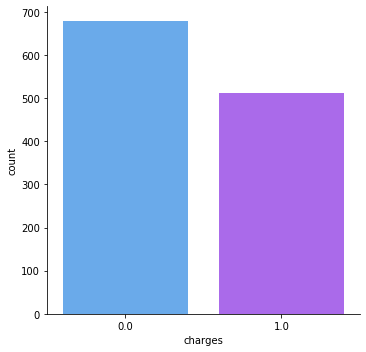

In [117]:
sns.catplot(x="charges", kind="count", palette="cool", data=df3)

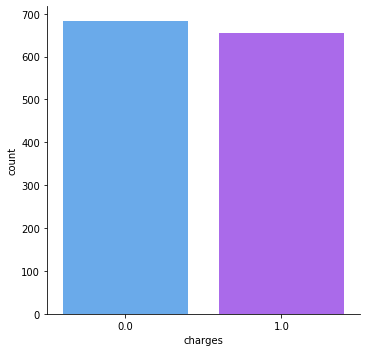

In [108]:
sns.catplot(x="charges", kind="count", palette="cool", data=df2)

In [323]:
feature_cols = ['age','sex','bmi','children','smoker','region'] # a lsit of the predictors
X = df2[feature_cols] # subsetting our data to only the predictors
y = df2['charges'] # our response variable

In [218]:
y

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
1333    1.0
1334    0.0
1335    0.0
1336    0.0
1337    1.0
Name: charges, Length: 1337, dtype: float64

In [207]:
#split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)
print (X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(1002, 6) (335, 6) (1002,) (335,)


In [325]:
from sklearn.linear_model import LogisticRegression
# instantate our model
logreg = LogisticRegression()
# fit our model to our training set
logreg.fit(X_train, y_train)

In [209]:
# score it on our test set to get a better sense of out of sample performance
logreg.score(X_test, y_test)


0.8895522388059701

In [210]:
logreg.score(X_train, y_train)

0.909181636726547

In [211]:
# pair the feature names with the coefficients
zip(feature_cols, logreg.coef_)
print(feature_cols)
print(logreg.intercept_)
print(logreg.coef_)

['age', 'sex', 'bmi', 'children', 'smoker', 'region']
[-7.64437395]
[[0.14578608 0.20539504 0.00912558 0.03348296 6.1648444  0.17765354]]


## Witout outliers !

In [164]:
feature_cols = ['age','sex','bmi','children','smoker','region'] # a lsit of the predictors
X4 = df3[feature_cols] # subsetting our data to only the predictors
y4 = df3['charges'] # our response variable
#split data to train and test
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4)
# instantate our model
logreg = LogisticRegression()
# fit our model to our training set
logreg.fit(X_train4, y_train4)
logreg.score(X_test4, y_test4)

0.889261744966443

In [241]:
error = pd.DataFrame({'Actual': y_test, 'Predicted': LR_prediction})
error.head(20)

,Actual,Predicted
1059,0.0,0.0
372,0.0,0.0
726,0.0,0.0
961,0.0,0.0
1017,0.0,0.0
141,0.0,0.0
580,1.0,1.0
74,0.0,0.0
348,0.0,0.0
1272,1.0,0.0


In [212]:
from sklearn.metrics import confusion_matrix
LR_prediction = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test.tolist(), LR_prediction.tolist())
print(confusion_matrix)

[[162  21]
 [ 16 136]]


Text(0.5, 0, 'Predicted label')

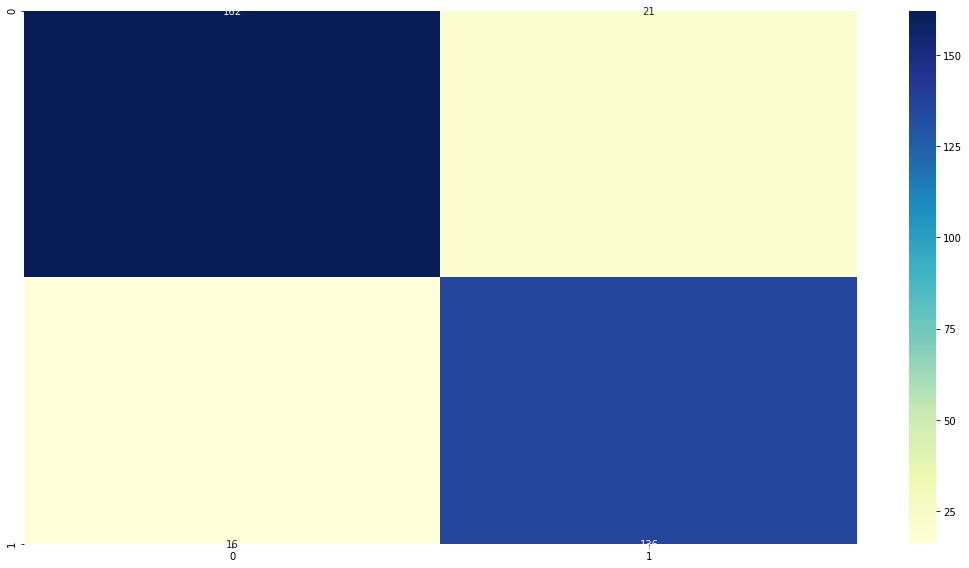

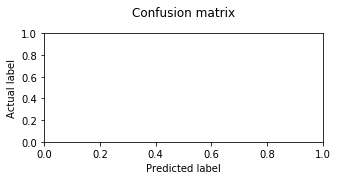

In [213]:
class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap

sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.figure(figsize=(5,2))
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

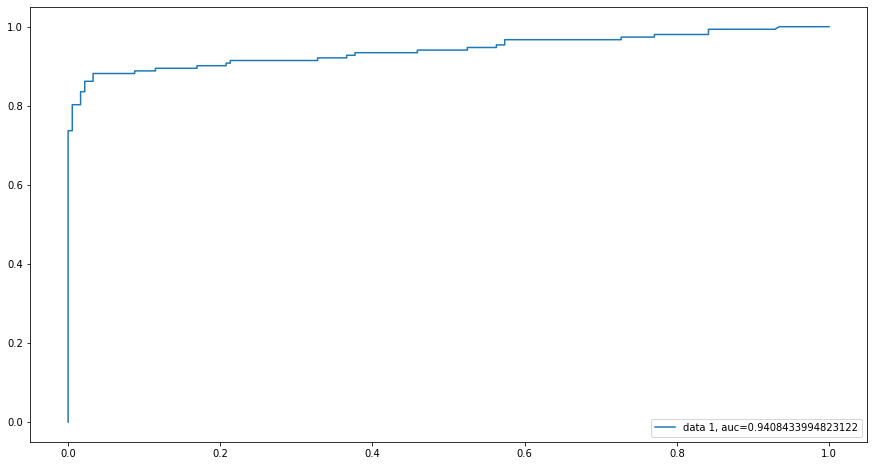

In [215]:
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [216]:
from sklearn.metrics import mean_squared_error
# Compute error between our test predictions and the actual values.
mean_squared_error(LR_prediction, y_test.tolist())

0.11044776119402985

In [217]:

# generate class probabilities
probs = logreg.predict_proba(X_test)
print (probs)

[[8.91305783e-01 1.08694217e-01]
 [5.66923049e-01 4.33076951e-01]
 [6.98778785e-01 3.01221215e-01]
 [9.42523070e-01 5.74769295e-02]
 [9.56554346e-01 4.34456545e-02]
 [9.43392926e-01 5.66070745e-02]
 [1.26370448e-01 8.73629552e-01]
 [6.75929211e-01 3.24070789e-01]
 [8.21838420e-01 1.78161580e-01]
 [6.50210840e-01 3.49789160e-01]
 [6.68892062e-01 3.31107938e-01]
 [1.75929423e-01 8.24070577e-01]
 [7.74116476e-01 2.25883524e-01]
 [4.38063406e-01 5.61936594e-01]
 [8.97450704e-01 1.02549296e-01]
 [5.58343613e-03 9.94416564e-01]
 [2.82299340e-01 7.17700660e-01]
 [3.05293847e-01 6.94706153e-01]
 [5.51266594e-01 4.48733406e-01]
 [8.90893960e-01 1.09106040e-01]
 [9.11156669e-01 8.88433307e-02]
 [3.65718878e-01 6.34281122e-01]
 [3.65738909e-04 9.99634261e-01]
 [7.04228890e-01 2.95771110e-01]
 [9.28402442e-01 7.15975576e-02]
 [9.72551444e-02 9.02744856e-01]
 [4.59345348e-01 5.40654652e-01]
 [4.75240962e-01 5.24759038e-01]
 [9.26019701e-01 7.39802986e-02]
 [2.57563198e-01 7.42436802e-01]
 [9.706338